# DBSCAN


Comenzaremos cargando los mismos datasets sintéticos que cargamos en la clase de KMEANS


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c:\Users\apacek\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\apacek\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\apacek\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

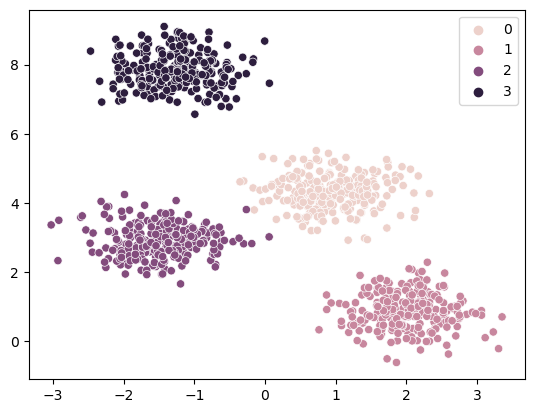

In [3]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

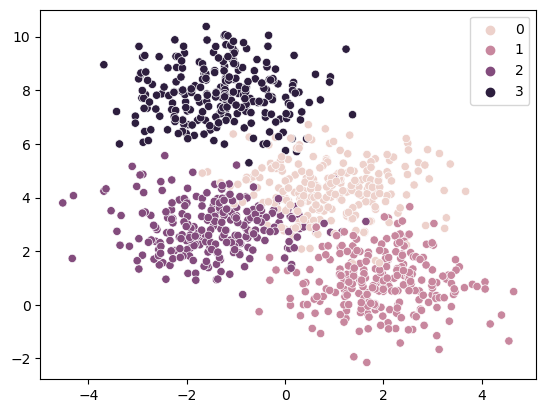

In [4]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

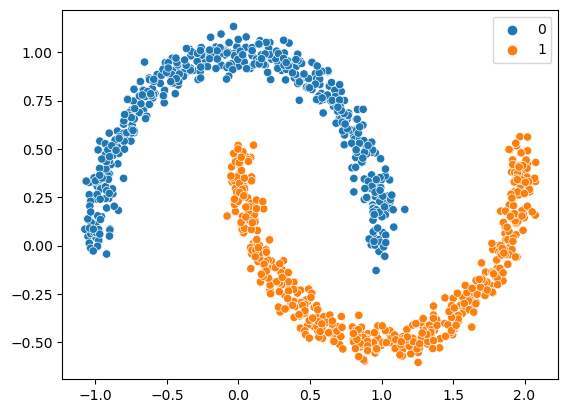

In [5]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

Ahora deben importar DBSCAN (de sklearn) y definir 3 modelos. Cada uno con su propio valor de eps y min_samples.

Para el modelo 1: epsilon de 0.3 y min_samples 10

Para el modelo 2: epsilon de 0.4 y min samples 9

Para el modelo 3: epsilon de 0.2 y min_samples 10

In [6]:
from sklearn.cluster import DBSCAN

db_1 = DBSCAN(eps=0.3, min_samples=10)
db_2 = DBSCAN(eps=0.4, min_samples=9)
db_3 = DBSCAN(eps=0.2, min_samples=10)

Al igual que KMEANS, ahora debemos entrenar cada uno de los modelos

In [7]:
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=10)

Podemos consultar las etiquetas asignadas luego de entrenar en la variable labels_. Notemos que cuando el label sea igual a '-1' quiere decir que esa instancia fue considerada ruido.

In [8]:
labels_1 = db_1.labels_

In [15]:
labels_1

array([ 0,  1,  0,  2,  3,  1,  1, -1,  1,  1,  0,  3,  2,  0,  3, -1,  2,
        0,  1,  3,  1,  0,  3,  3,  3,  2,  3,  3,  3,  2,  3,  1,  0,  2,
        0,  1,  0,  1,  2,  2,  1,  1,  1,  2,  0,  1,  1,  0,  2,  1,  3,
        1,  1,  2,  0,  3,  1,  1,  0,  0, -1,  3,  2,  2,  2,  0,  1,  2,
        0,  0,  0,  0,  0, -1,  1,  0,  1,  0,  2,  3,  1, -1,  1,  2,  3,
       -1,  1,  1,  2,  2,  0,  2,  2,  0, -1,  0,  2, -1,  1,  1,  3,  2,
        1,  3,  1,  2,  1,  0,  2,  3,  1,  1,  2,  0,  2,  2,  1,  2, -1,
        3,  3,  0,  2,  2,  1,  3,  1,  0,  2,  3,  3,  1,  2,  1,  1,  1,
        2,  1,  3,  0,  3,  0,  3,  1,  0,  0,  3,  1,  0,  0,  3,  1,  1,
        1,  2, -1,  1,  1,  3,  2,  0,  3,  1,  1,  1,  1,  0,  0,  1,  3,
        2,  3,  3,  3,  2,  3,  2,  3,  3,  1,  2,  1,  2,  1,  1,  2,  3,
        2,  3,  0, -1,  1,  3,  3,  2,  0,  2,  0,  2,  2,  2,  1,  0,  0,
        3,  3,  2,  1,  0,  1,  0,  2,  1,  0,  2,  1,  1, -1,  3, -1,  1,
        1,  1,  0, -1,  1

In [9]:
np.unique(labels_1)

array([-1,  0,  1,  2,  3], dtype=int64)

In [10]:
labels_2 = db_2.labels_
labels_3 = db_3.labels_

print(f"Clusters en dataset 2: {np.unique(labels_2)}\nClusters en dataset 3: {np.unique(labels_3)}")

Clusters en dataset 2: [-1  0  1  2]
Clusters en dataset 3: [0 1]


La siguiente función plotea los resultados de manera tal que colorea con distintos colores los distintos clusters, en gris los datos que se consideran Noise y ademas en tamaño mas grande las instancias que son CORES. No hace falta que cambien nada de esta función.

In [11]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title(f"Número de clusters: {n_clusters_1}")
    plt.show()
    return

Ploteamos el resultado para el primer caso. Les parece adecuado el resultado? Pruebe que pasa si modifica los parámetros de epsilon y min_dist.

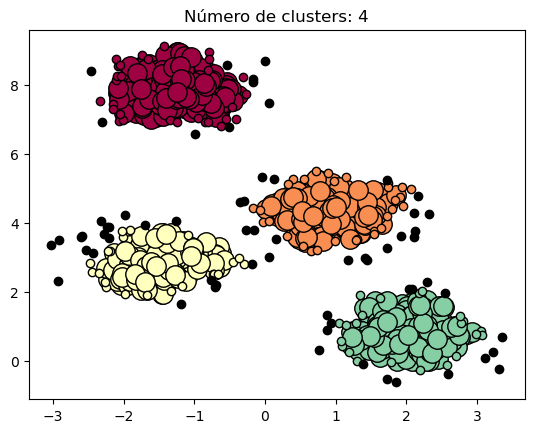

In [12]:
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0) #Obtenemos el número de clusters descartando los -1 (noise)
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

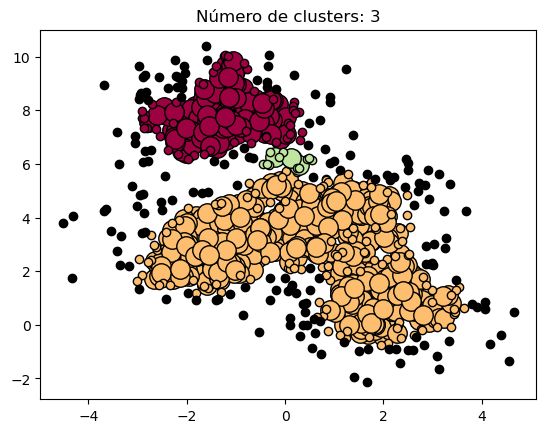

In [13]:
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

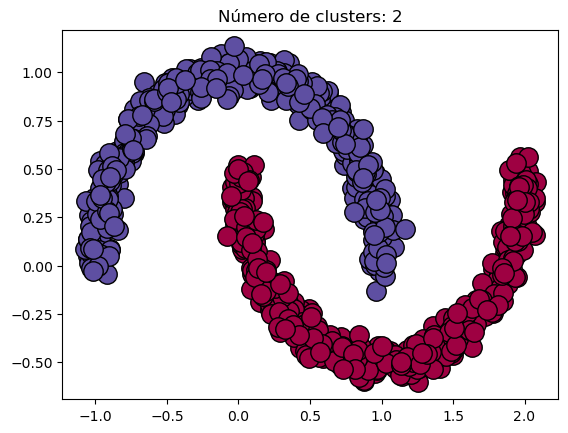

In [14]:
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

# Desafío

Al igual que con KMEANS, segmentar el siguiente dataset y comparar los resultados obtenidos con los de KMEANS

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mEzq69qMsTkPt-ciGAFYmhMF2jt2q0k5' -O users.csv

In [ ]:
import pandas as pd

df = pd.read_csv("/content/users.csv", sep='\t')
df = df[["ID", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome",
              "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
              "MntSweetProducts", "NumWebPurchases"]]
df.head()